In [1]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
base = Path("/Users/larsankile/code/surveillance-metric-2/data_original")

In [3]:
# Group by `address` and `block_number` and count the number of swaps
# but do it lazily
swap_counts = (
    pl.scan_parquet(base / "swaps/*.parquet")
    .group_by(["address", "block_number"])
    .agg(swap_count=pl.len())
).collect()

In [4]:
swap_counts.sort("swap_count", descending=True)

address,block_number,swap_count
str,i64,u32
"""0x88e6a0c2ddd26feeb64f039a2c41…",18474075,252
"""0xb03f87e577c4fe4685cf2c88a847…",16330521,197
"""0xa42bfbf7c87207874ce975b59d42…",18622654,155
"""0x6505215f0aa54ccef41b24ee62ea…",18551883,121
"""0xe2cd56d47ba10ee2e9f5ae85ce77…",18396262,109
…,…,…
"""0x1837164d1ac7cb56d75c8964aab9…",13681373,1
"""0x82743c07bf3be4d55876f87bca6c…",16303526,1
"""0x07f3d316630719f4fc69c152f397…",14492347,1


[]

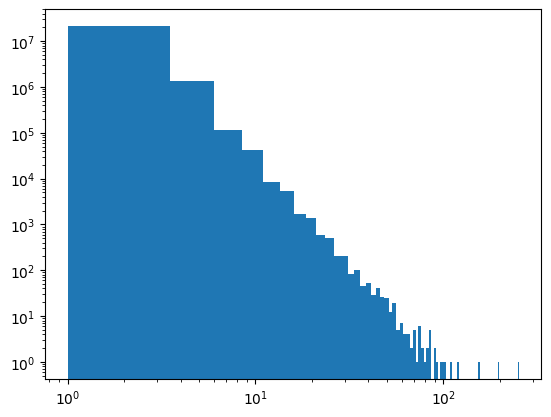

In [6]:
plt.hist(swap_counts.get_column("swap_count").to_numpy(), bins=100)
plt.loglog()

In [7]:
# Write the result to a file
swap_counts.write_parquet(base / "swap_counts.parquet")